### Lending club
Uses the Kaggle dataset- All Lending Club Loan Data (2007 through current).
#https://www.kaggle.com/wordsforthewise/lending-club

#### Preliminary analyses. This looks at the general information/patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import folium as folium
import os

In [2]:
# df = pd.read_csv("data/accepted_2007_to_2018Q2.csv", low_memory=False)

In [3]:
tot = pd.read_csv("exports/total.csv")
total = tot["count"][0]
print("The total number of records in the database is {}.".format(total))

The total number of records in the database is 329268.


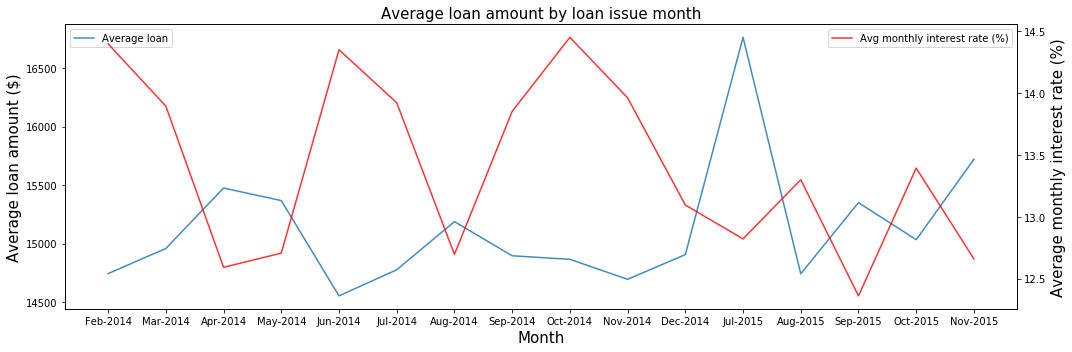

In [4]:
#average loan by month.
loan_month = pd.read_csv("exports/loan-by-month.csv")
xmonth = loan_month["issue_d"]
xmonth = xmonth.reindex(index = [4, 8, 0, 9, 7, 5, 1, 14, 12, 10, 3, 6, 2, 15, 13, 11])
yavg_loan = loan_month["avg"]
month_cat = np.arange(len(xmonth))

#average interest by month
int_month = pd.read_csv("exports/interest-by-month.csv")
yavg_int = int_month["avg"]
month_cat = np.arange(len(xmonth))

#plot figure
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)

#figure for avg loan by month
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Average loan amount ($)',fontsize=15)
ax1.set_title('Average loan amount by loan issue month',fontsize=15)
ax1.plot(xmonth, yavg_loan, alpha=0.85, label='Average loan')

#figure for avg monthly interest
ax2 = ax1.twinx()
ax2.set_ylabel('Average monthly interest rate (%)',fontsize=15)
ax2.plot(xmonth, yavg_int, alpha=0.8, 
         label='Avg monthly interest rate (%)',
         color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

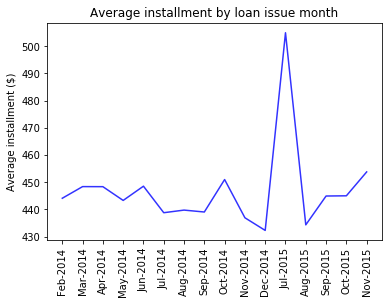

In [5]:
#average installment by month
install = pd.read_csv("exports/instal-by-month.csv")
xmonth = install["issue_d"]
xmonth = xmonth.reindex(index = [4, 8, 0, 9, 7, 5, 1, 14, 12, 10, 3, 6, 2, 15, 13, 11])
yavg_instal = install["avg"]
month_cat = np.arange(len(xmonth))

plt.plot(xmonth, yavg_instal, alpha=0.8, color="b")
plt.xticks(month_cat, xmonth, rotation=90)
plt.ylabel("Average installment ($)")
plt.title("Average installment by loan issue month")
plt.show()

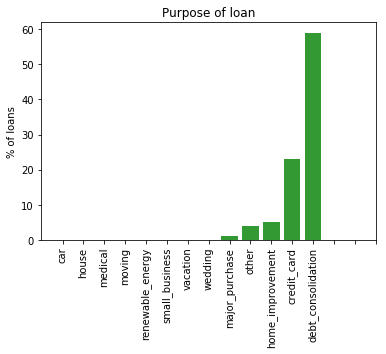

In [6]:
#purpose of loan
purpose = pd.read_csv("exports/purpose.csv")
x_purpose = purpose["purpose"]
y_perct = purpose["Percentage"] 
purpose_cat = np.arange(len(x_purpose))

plt.bar(x_purpose, y_perct, alpha=0.8, color="g")
plt.xticks(month_cat, x_purpose, rotation=90)
plt.ylabel("% of loans")
plt.title("Purpose of loan")
plt.show()

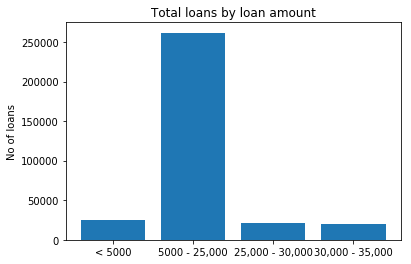

In [7]:
#loan amount categories
loan_amt = pd.read_csv("exports/loan-amount.csv")
loan_amt = loan_amt.reindex(index = [3, 2, 0, 1])

loan_cat = np.arange(len(loan_amt["loan amount category"]))
xloan = loan_amt["loan amount category"]
yloan = loan_amt["Total within range"]

plt.bar(loan_cat, yloan)
plt.xticks(loan_cat, xloan)
plt.ylabel("No of loans")
plt.title("Total loans by loan amount")
plt.show()

In [8]:
# status of loans
loan_type = pd.read_csv("exports/loan-status.csv")
loan_type

,loan_status,No of loans
0,Default,18
1,Late (16-30 days),706
2,In Grace Period,1449
3,Late (31-120 days),3334
4,Charged Off,49558
5,Current,82939
6,Fully Paid,191264


Given the above, loans will be categorized as follows: 
1) good loans (this will be made up of fully paid loans).  
2) bad loans (will consist of charged off loans.
Remaining will not be taken into account as information is insufficient to determine which category they fall into.

In [9]:
#loan types we'll be looking at
loan_type = loan_type.drop([0, 1, 2, 3, 5])
loan_type

,loan_status,No of loans
4,Charged Off,49558
6,Fully Paid,191264


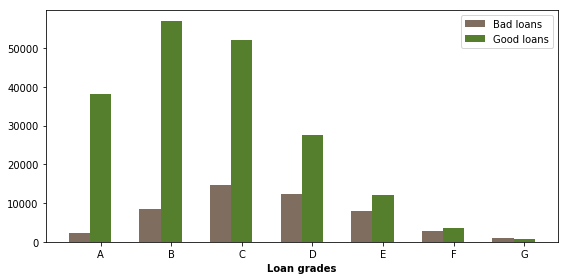

In [10]:
#good and bad loans by loan grade
loan_grade = pd.read_csv("exports/loan-grade.csv")

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
xgrade = loan_grade["grade"].drop_duplicates()
y_bad = loan_grade[loan_grade["loan_status"] == "Charged Off"]["Loans per grade"]
y_good = loan_grade[loan_grade["loan_status"] == "Fully Paid"]["Loans per grade"]

# Set position of bar on X axis
r1 = np.arange(len(xgrade))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color='#7f6d5f', width=barWidth, label='Bad loans')
plt.bar(r2, y_good, color='#557f2d', width=barWidth, label='Good loans')
 
# Add xticks on the middle of the group bars
plt.xlabel('Loan grades', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(xgrade))], ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

In [11]:
#good loans by state
good_loans_state = pd.read_csv("exports/good-loans-state.csv")
#Vol of loans by state.
#load map shape (US states)
state_geo = os.path.join('data', 'us-states.json')

#load loan data for each state
df = os.path.join('exports', 'good-loans-state.csv')
good_loans = pd.read_csv(df)

#initialize map
m = folium.Map(location=[37, -102], zoom_start=4)

#set parameters for map, add color.
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=good_loans,
    columns=['addr_state', 'No of loans'],
    key_on='feature.id',
    fill_color='BuGn',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='No of good loans'
).add_to(m)
folium.LayerControl().add_to(m)
m

# # Save to html
# m.save('#good_loans_map.html')

In [12]:
#bad loans by state
bad_loans_state = pd.read_csv("exports/bad-loans-state.csv")
#Vol of loans by state.
#load map shape (US states)
state_geo = os.path.join('data', 'us-states.json')

#load loan data for each state
df = os.path.join('exports', 'bad-loans-state.csv')
bad_loans = pd.read_csv(df)

#initialize map
m = folium.Map(location=[37, -102], zoom_start=4)

#set parameters for map, add color.
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=bad_loans,
    columns=['addr_state', 'No of loans'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='No of bad loans'
).add_to(m)
folium.LayerControl().add_to(m)
m

# # Save to html
# m.save('#bad_loans_map.html')

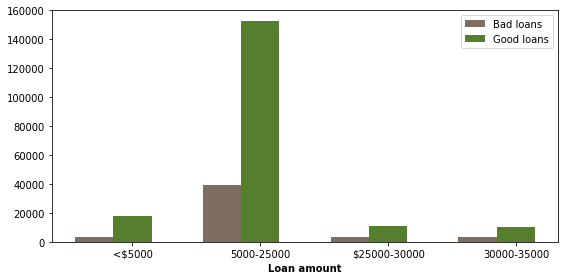

In [13]:
#loan amount by loan status
lsa = pd.read_csv("exports/loan-amount-status.csv")
lsa = lsa.reindex(index = [3, 2, 0, 1, 7, 6, 4, 5])

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_grade = lsa["loan amount category"].drop_duplicates()
y_bad = lsa[lsa["loan_status"] == "Charged Off"]["Total within range"]
y_good = lsa[lsa["loan_status"] == "Fully Paid"]["Total within range"]

# Set position of bar on X axis
r1 = np.arange(len(x_grade))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color='#7f6d5f', width=barWidth, label='Bad loans')
plt.bar(r2, y_good, color='#557f2d', width=barWidth, label='Good loans')
 
# Add xticks on the middle of the group bars
plt.xlabel('Loan amount', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x_grade))], ['<$5000', '5000-25000', '$25000-30000', '30000-35000'])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

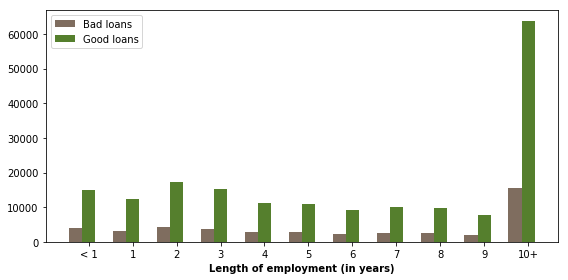

In [14]:
#employment length by loan type
lel = pd.read_csv("exports/loan-emp-length.csv")
lel = lel.reindex(index = [10, 0, 2, 3, 4, 5, 6, 7, 8, 9, 1, 21, 11, 13, 14, 15, 16, 17, 18, 19, 20, 12])

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_length = lel["emp_length"].drop_duplicates()
y_bad = lel[lel["loan_status"] == "Charged Off"]["count"]
y_good = lel[lel["loan_status"] == "Fully Paid"]["count"]

# Set position of bar on X axis
r1 = np.arange(len(x_length))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color='#7f6d5f', width=barWidth, label='Bad loans')
plt.bar(r2, y_good, color='#557f2d', width=barWidth, label='Good loans')
 
# Add xticks on the middle of the group bars
plt.xlabel('Length of employment (in years)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x_length))], ['< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

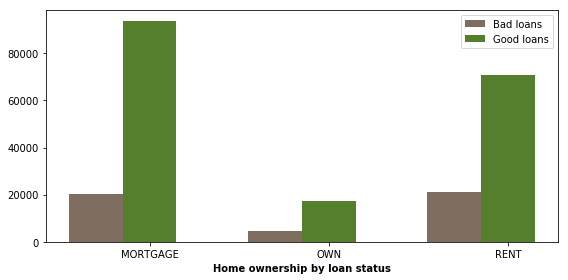

In [17]:
#home ownership by loan type
hl = pd.read_csv("exports/home-loan.csv")

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_length = hl["home_ownership"].drop_duplicates()
y_bad = hl[hl["loan_status"] == "Charged Off"]["count"]
y_good = hl[hl["loan_status"] == "Fully Paid"]["count"]

# Set position of bar on X axis
r1 = np.arange(len(x_length))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color='#7f6d5f', width=barWidth, label='Bad loans')
plt.bar(r2, y_good, color='#557f2d', width=barWidth, label='Good loans')
 
# Add xticks on the middle of the group bars
plt.xlabel('Home ownership by loan status', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x_length))], ['MORTGAGE', 'OWN', 'RENT'])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

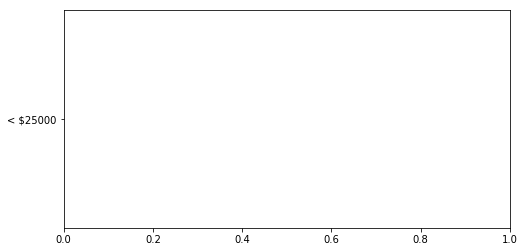

In [30]:
#annual income and home ownership.
iho = pd.read_csv("exports/income-loan.csv")
iho = iho.reindex(index = [2, 0, 3, 1, 4, 6, 5, 7])

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_length = iho["loan_status"].drop_duplicates()
y_bad = iho[iho["loan_status"] == "Charged Off"]["income category"]
y_good = iho[iho["loan_status"] == "Fully Paid"]["income category"]

# Set position of bar on X axis
r1 = np.arange(len(x_length))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color='#7f6d5f', width=barWidth, label='Bad loans')
plt.bar(r2, y_good, color='#557f2d', width=barWidth, label='Good loans')
 
# Add xticks on the middle of the group bars
plt.xlabel('Income by loans', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x_length))], ['Charged Off', 'Fully Paid'])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()